<a href="https://colab.research.google.com/github/sara-then/HGF-drugdiscovery-project/blob/main/project_drugdiscovery_pt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Drug Discovery Project (Part 4)
Part 4: Buidlding Random Forest Regression Model 

## Importing necessary libraries


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading the dataset 

In [ ]:
df = pd.read_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv')

## Evaluating the features/variables
The dataset contains 881 input features and 1 output variable (pIC50 values).

### Input features 

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4826,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4827,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4828,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Output feature 

In [ ]:
Y = df.pIC50
Y

0       5.000000
1       5.000000
2       5.000000
3       5.000000
4       4.000000
          ...   
4825    7.081445
4826    9.000000
4827    8.537602
4828    7.958607
4829    6.000000
Name: pIC50, Length: 4830, dtype: float64

### Removing low variance features 
Setting variance threshold of 0.1

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP13,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,...,PubchemFP761,PubchemFP777,PubchemFP779,PubchemFP784,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP821,PubchemFP824
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,1,1,0,0,0,0,...,1,1,1,1,0,1,0,1,1,1
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4826,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4827,1,0,0,1,1,1,1,1,0,0,...,1,1,0,1,0,1,0,1,1,1
4828,1,0,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Data splitting (80/20 ratio)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

In [ ]:
X_train.shape, Y_train.shape

((3864, 222), (3864,))

In [ ]:
X_test.shape, Y_test.shape

((966, 222), (966,))

## Building a Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# set seed
np.random.seed(100)

# train model 
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

# R-squared 
r2 = model.score(X_test, Y_test)
r2


SyntaxError: ignored

**Evaluating the Goodness-of-Fit: R-squared value**


The model has an R-squared value of 0.56 (~56%). The R-squared value is the percentage of the dependent variable variation that the linear model explains.

In [ ]:
# make prediction 
Y_pred_rf = model.predict(X_test)

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
mse_rf

0.695465501069804

### Scatter plot of Experimental vs. Predicted pIC50 values 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

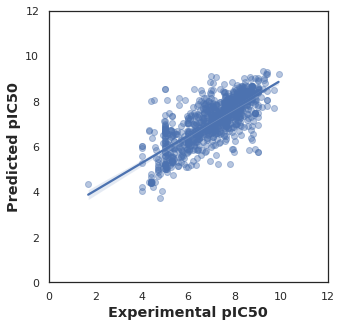

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred_rf, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [ ]:
from sklearn.metrics import mean_squared_error
import math 

# MSE
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
print(mse_rf)

# RMSE 
rmse_rf = math.sqrt(mse_rf)
print(rmse_rf)

0.6960475394138144
0.8342946358534342


## Building a Support Vector Machine (SVM) Model 

In [ ]:
from sklearn.svm import SVR

# set seed
np.random.seed(1000)

# train model 
model_svm = SVR(kernel='rbf')
model_svm.fit(X_train, Y_train)
r2_svm = model_svm.score(X_test, Y_test)
r2_svm

0.5568705485656258

In [ ]:
# make prediction 
Y_pred_svm = model_svm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
# MSE
mse_svm = mean_squared_error(Y_test, Y_pred_svm)
print(mse_svm)

#RMSE
rmse_svm = math.sqrt(mse_svm)
print(rmse_svm)

0.7066064689152478
0.8405988751570203


### Scatter plot of Experimental vs. Predicted pIC50 values 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

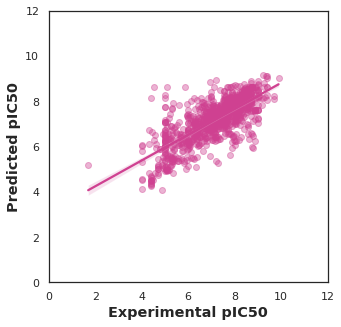

In [ ]:
sns.set_palette('PiYG')
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred_svm, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## Saving best performing model as Pickle Object 
After evaluating performance of both Random Forest and SVM models, the Random Forest model is determined to be a better fit for the data (r2 score is higher and lower MSE/RMSE). The Pickle Object will be used to build the webapp.

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))